Similar image detection

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


importing nessary lib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics.pairwise import cosine_similarity
import cv2
import os


In [6]:
from keras.applications import VGG16

model = VGG16(weights='/Users/jeevanhr/mlops/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(224, 224, 3))


In [7]:
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = tf.keras.applications.vgg16.preprocess_input(image)
    return image


In [8]:
def extract_features(image_path, model):
    image = preprocess_image(image_path)
    features = model.predict(image)
    features = features.flatten()  # Flatten the features to a 1D array
    return features


In [9]:
def calculate_similarity(feature_vector_1, feature_vector_2):
    similarity = cosine_similarity([feature_vector_1], [feature_vector_2])
    return similarity[0][0]


In [10]:
def find_similar_images(target_image_path, image_folder, model, top_n=5):
    target_features = extract_features(target_image_path, model)
    similarities = {}

    for image_name in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_name)
        if image_path != target_image_path:
            image_features = extract_features(image_path, model)
            similarity = calculate_similarity(target_features, image_features)
            similarities[image_name] = similarity

    # Sort images by similarity in descending order and select the top_n
    similar_images = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return similar_images


In [16]:
target_image_path = '/Users/jeevanhr/mlops/data/vishnu/Got.jpg'
image_folder = '/Users/jeevanhr/mlops/data/vishnu'

similar_images = find_similar_images(target_image_path, image_folder, model, top_n=5)

print("Top similar images:")
for image_name, similarity_score in similar_images:
    print(f"Image: {image_name}, Similarity Score: {similarity_score}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Top similar images:
Image: IMG_0293.jpeg, Similarity Score: 0.2701948285102844
Image: Screenshot 2024-07-05 at 11.10.57 PM.png, Similarity Score: 0.23358210921287537
Image: Screenshot 2024-07-05 at 11.10.23 PM.png, Similarity Score: 0.15795570611953735
Image: IMG_0294.jpeg, Similarity Score: 0.1378818154335022
Image: Screenshot 2024-07-05 at 11.47.28 PM.png, Similarity Scor

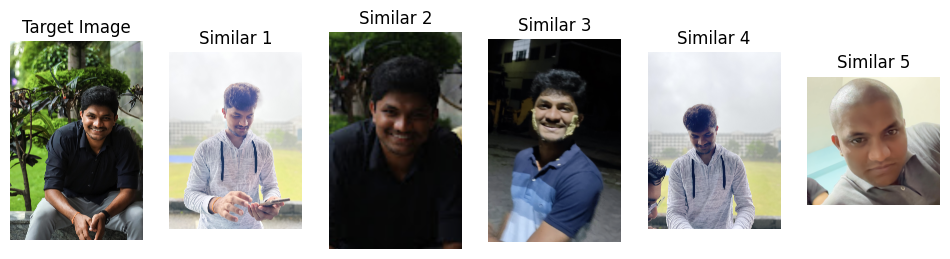

In [17]:
def display_similar_images(target_image_path, similar_images, image_folder):
    target_image = cv2.imread(target_image_path)
    target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, len(similar_images) + 1, 1)
    plt.imshow(target_image)
    plt.title("Target Image")
    plt.axis('off')

    for i, (image_name, _) in enumerate(similar_images):
        image_path = os.path.join(image_folder, image_name)
        similar_image = cv2.imread(image_path)
        similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, len(similar_images) + 1, i + 2)
        plt.imshow(similar_image)
        plt.title(f"Similar {i+1}")
        plt.axis('off')

    plt.show()

display_similar_images(target_image_path, similar_images, image_folder)
